In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_train=x_train/255.0
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_test=x_test/255.0

In [12]:
x_test.shape

(10000, 28, 28, 1)

In [5]:
y_train[0]

5

In [6]:
batch_size=60
num_classes=10
epochs=2

In [7]:
y_train=tf.one_hot(y_train.astype(np.int32),depth=10)
y_test=tf.one_hot(y_test.astype(np.int32),depth=10)

In [8]:
model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
tf.keras.layers.MaxPool2D((2,2),strides=2),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/2
900/900 [==============================] - 121s 133ms/step - loss: 0.1563 - acc: 0.9517 - val_loss: 0.0550 - val_acc: 0.9843
Epoch 2/2
900/900 [==============================] - 128s 142ms/step - loss: 0.0571 - acc: 0.9829 - val_loss: 0.0450 - val_acc: 0.9893


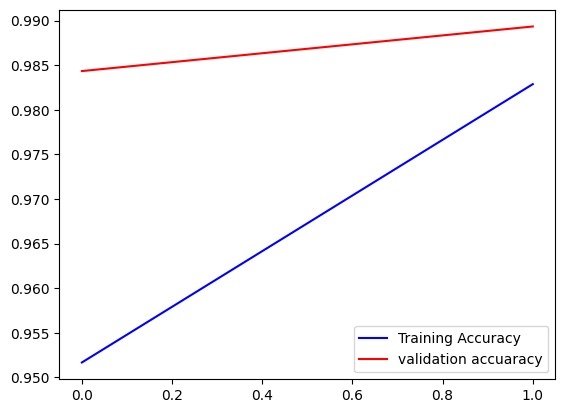

In [15]:
plt.plot(history.history['acc'],color='b',label='Training Accuracy')
plt.plot(history.history['val_acc'],color='r',label='validation accuaracy')
plt.legend()